In [1]:
from utils import track_all, extract_frames, detect_frame
from deeptrack.models import LodeSTAR
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

d:\miniconda3\envs\pt\lib\site-packages\deeptrack\backend\_config.py:11: UserWarning: cupy not installed. GPU-accelerated simulations will not be possible
  warnings.warn(
d:\miniconda3\envs\pt\lib\site-packages\deeptrack\backend\_config.py:25: UserWarning: cupy not installed, CPU acceleration not enabled
  warnings.warn("cupy not installed, CPU acceleration not enabled")
d:\miniconda3\envs\pt\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
d:\miniconda3\envs\pt\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensor

In [2]:
%matplotlib inline
import cv2 as cv
import skimage

In [3]:
# frames = extract_frames("data\\videos\\025Hz-01.avi")
model = LodeSTAR(input_shape=(None, None, 3))
model.load_weights("models\model\weights")

In [4]:
alpha = 0.5
beta = 1 - alpha
cutoff = 0.999

In [5]:
scale = 0.294
fps = 56.95

1/1 [==============================] - 0s 129ms/step


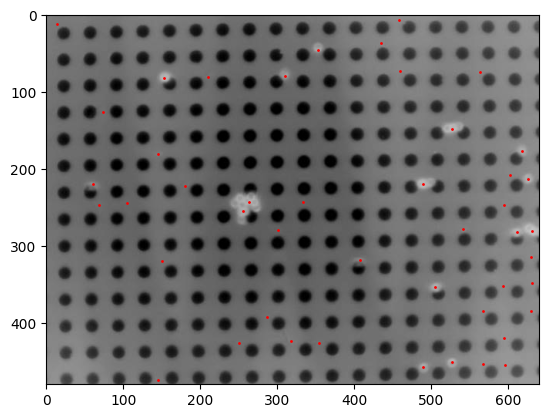

In [7]:
sample = extract_frames("D:\\OneDrive\\Desktop\\PhysicsResearch\\20230718 Dynabead M270 v vs f\\VvsF-videos 20230718\\24HzRMy1M270.avi")[44]
sample_detections = detect_frame(sample, model, alpha=alpha, beta=beta, cutoff=cutoff)
plt.imshow(sample)
plt.scatter(sample_detections[:, 1], sample_detections[:, 0], color="r", s=1)

In [ ]:
track_all("D:\\OneDrive\\Desktop\\PhysicsResearch\\20230718 Dynabead M270 v vs f\\VvsF-videos 20230718",
          model, scale, fps, min_duration=20, min_displacement=20, alpha=alpha, beta=beta, cutoff=cutoff,
          gap_closing_cost_cutoff=400, gap_closing_max_frame_count=5)